<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Problem" data-toc-modified-id="The-Problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Problem</a></span></li><li><span><a href="#Monte-Carlo-Optimization" data-toc-modified-id="Monte-Carlo-Optimization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Monte-Carlo Optimization</a></span></li><li><span><a href="#Documentation" data-toc-modified-id="Documentation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Documentation</a></span></li></ul></div>

# The Problem

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
def f(x,y):
    return 45+(x*y+y**2)/100   \
            -80*np.exp(-(x-20)**2/50-(y-50)**2/50)   \
            -150*np.exp(-(x-70)**2/50-(y-80)**2/50)

# Monte-Carlo Optimization

In [3]:
import random
random.seed(0)

Randomly generate points $(x_i, y_i)$. Whenever $f(x_i, y_i)$ is smaller than the minimum found so far, consider this point.

In [4]:
def monte_carlo(n, xmin=0, xmax=99, ymin=0, ymax=99):
    
    x = [ random.randint(xmin, xmax) for i in range(n)]
    y = [ random.randint(ymin, ymax) for i in range(n)]
    
    xp = [ x[0] ]
    yp = [ y[0] ]
    fmin = f(xp[0], yp[0])
    for i in range(1, len(x)):
        fi = f(x[i], y[i])
        if fi < fmin:
            xp += [x[i]]
            yp += [y[i]]
            fmin = fi
            
    xs = np.linspace(xmin, xmax, 100)
    ys = np.linspace(ymin, ymax, 100)
    xx, yy = np.meshgrid(xs, ys)
    z=f(xx, yy)
      
    fig, ax = plt.subplots(1, 1)
    fig.set_figwidth(6)
    fig.set_figheight(5)
    cs = ax.contourf(xs, ys, z, 100)
    fig.colorbar(cs, ax=ax)
    
    plt.scatter(x, y, c='red', marker='.')

    plt.plot(xp, yp, c='red')
    return len(xp), xp[-1], yp[-1], f(xp[-1], yp[-1])

(7, 68, 81, 29.96438729460607)

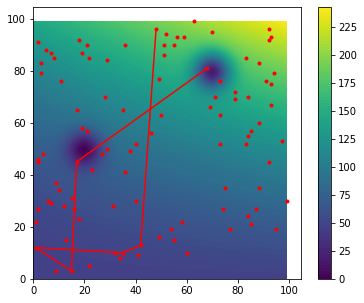

In [5]:
random.seed(41)
monte_carlo(100)

(8, 20, 50, -4.406223167566204e-28)

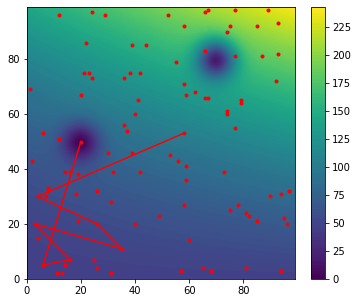

In [6]:
random.seed(40)
monte_carlo(100)

(6, 21, 49, 2.4368448678141448)

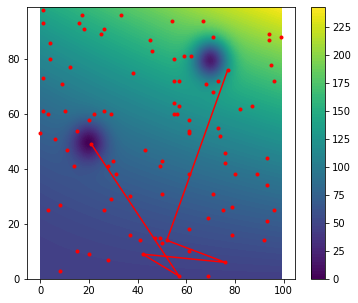

In [7]:
monte_carlo(100)

# Documentation

Relevant Python Documentation: 
- [math library](https://docs.python.org/3/library/math.html)
  [random](https://docs.python.org/3/library/random.html)
- [f-strings](https://docs.python.org/3/reference/lexical_analysis.html#f-strings)
- [numpy](https://numpy.org/doc/1.18/reference/index.html)
- [matplotlib](https://matplotlib.org)